# TABLE SCRAPPING

URL = https://pythonscraping.com/pages/page3.html

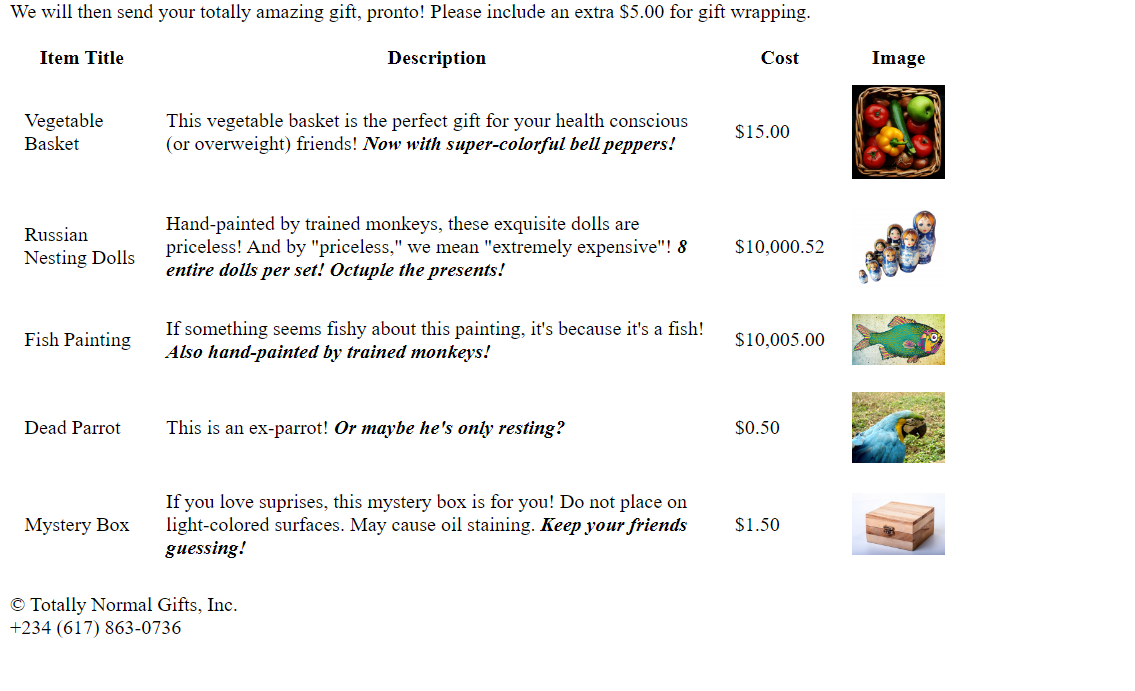

In [19]:
# Table in webpage
from IPython.display import Image
Image("C:\\Users\\sunil\\Documents\\web scraping\\tutorial\\website_table.png")

Import Necessary module 

In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import pandas as pd

In [13]:
url = urlopen('https://pythonscraping.com/pages/page3.html')  # Sending a HTTP request to the specified URL 
soup = bs(url)                                                # convert to a beautiful soup object
print(soup.prettify())

<html>
 <head>
  <style>
   img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
  </style>
 </head>
 <body>
  <div id="wrapper">
   <img src="../img/gifts/logo.jpg" style="float:left;"/>
   <h1>
    Totally Normal Gifts
   </h1>
   <div id="content">
    Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.
    <p>
     We haven't figured out how to make online shopping carts yet, but you can send us a check to:
     <br/>
     123 Main St.
     <br/>
     Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.
    </p>
   </div>
   <table id="giftList">
    <tr>
     <th>
      Item Title
     </th>
     <th>
      Description
     </th>
     <th>
      Cost
     </th>
     <th>
      Image
     </th>
   

## Converting Table to DataFrame

In [14]:
table = soup.select('table#giftList')[0]                  # parsing to table 

table_colm = table.find_all('th')                         # table column_names    
colm_name=[c.string.strip() for c in table_colm]

table_rows = table.find_all('tr')                         #table Rows

l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.get_text().strip() for tr in td]
    l.append(row)
df = pd.DataFrame(l, columns=colm_name)
df.head()


,Item Title,Description,Cost,Image
0,None,None,None,None
1,Vegetable Basket,This vegetable basket is the perfect gift for ...,$15.00,
2,Russian Nesting Dolls,"Hand-painted by trained monkeys, these exquisi...","$10,000.52",
3,Fish Painting,"If something seems fishy about this painting, ...","$10,005.00",
4,Dead Parrot,This is an ex-parrot! Or maybe he's only resting?,$0.50,


In [15]:
del df['Image']                              # Drop Image Column

In [16]:
df.head()

,Item Title,Description,Cost
0,None,None,None
1,Vegetable Basket,This vegetable basket is the perfect gift for ...,$15.00
2,Russian Nesting Dolls,"Hand-painted by trained monkeys, these exquisi...","$10,000.52"
3,Fish Painting,"If something seems fishy about this painting, ...","$10,005.00"
4,Dead Parrot,This is an ex-parrot! Or maybe he's only resting?,$0.50


In [17]:
df.drop(df.index[0],axis = 0, inplace= True)              #Drop first row usign index method 
df.head()

,Item Title,Description,Cost
1,Vegetable Basket,This vegetable basket is the perfect gift for ...,$15.00
2,Russian Nesting Dolls,"Hand-painted by trained monkeys, these exquisi...","$10,000.52"
3,Fish Painting,"If something seems fishy about this painting, ...","$10,005.00"
4,Dead Parrot,This is an ex-parrot! Or maybe he's only resting?,$0.50
5,Mystery Box,"If you love suprises, this mystery box is for ...",$1.50


In [32]:
df.iloc[1]['Description']

'Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!'

# Converting Dataframe to .csv file

In [38]:
df.to_csv('gift_table.csv')

In [3]:
pwd

'C:\\Users\\sunil\\Documents\\web scraping\\tutorial'